<a href="https://www.kaggle.com/code/wadedy/telephony-app?scriptVersionId=218350721" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Install required libraries
!pip install google_play_scraper
!pip install pandas
!pip install matplotlib
!pip install wordcloud
!pip install arabic_reshaper
!pip install nbconvert[webpdf]
print("Done successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 14.1
    Uninstalling websockets-14.1:
      Successfully uninstalled websockets-14.1
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2024.8.0 requires dask==2024.8.0, but you have dask 2024.12.1 which is incompatible.
google-ge

In [3]:
# Importing libraries 
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from google_play_scraper import app, reviews, Sort
import arabic_reshaper
from collections import Counter
import calendar
import time
print("Done successfully!")


Done successfully!


In [4]:
# **Specify app ID and other parameters**
app_id = 'com.ntra.citizen'  # Replace with the actual app ID
num_reviews = 24000  # Adjust this value considering ethical scraping practices

# **Scrape reviews from Google Play (with delay between requests)**
result, _ = reviews(
    app_id=app_id,
    lang='ar',  # Set language to Arabic
    country='us',
    sort=Sort.NEWEST,
    count=num_reviews
)

# Introduce a delay between requests (adjust as needed)
time.sleep(5)  # Example: 5 seconds delay

# Convert the result to a list of reviews
reviews_list = list(result)

# Create a data frame from the scraped reviews
df = pd.DataFrame(reviews_list)

# Save the reviews as a CSV file with UTF-8 encoding
df.to_csv('telephony-reviews.csv', index=False, encoding='utf-8-sig')

print("Reviews extracted and saved successfully!")


Reviews extracted and saved successfully!


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              2119 non-null   object        
 1   userName              2119 non-null   object        
 2   userImage             2119 non-null   object        
 3   content               2119 non-null   object        
 4   score                 2119 non-null   int64         
 5   thumbsUpCount         2119 non-null   int64         
 6   reviewCreatedVersion  1327 non-null   object        
 7   at                    2119 non-null   datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            1327 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 182.2+ KB


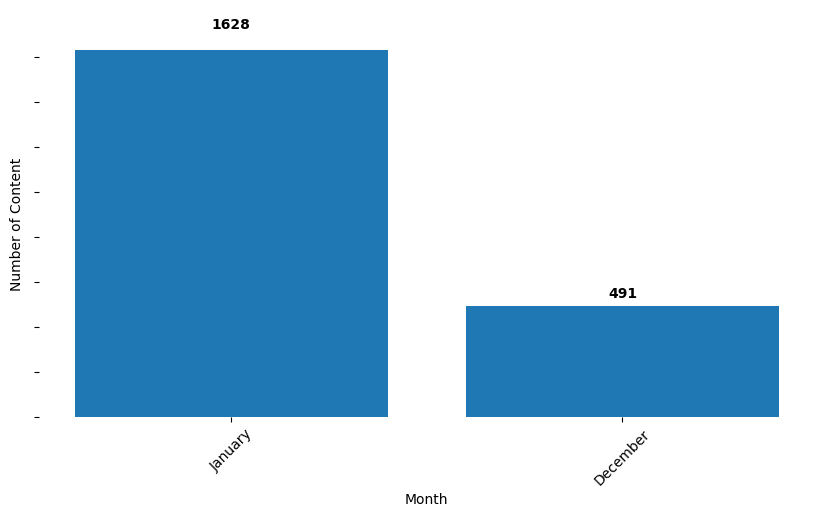

In [6]:
# Number of content per Month
df['at_month'] = pd.to_datetime(df['at']).dt.month
content_per_month = df['at_month'].value_counts().sort_index()

month_names = [calendar.month_name[i] for i in content_per_month.index]

plt.figure(figsize=(10, 5))
bars = plt.bar(month_names, content_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Content')  
plt.title(' ') # Remove the Title from the Chart
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability

# Remove the numbers from the y-axis
plt.gca().axes.yaxis.set_ticklabels([])

# Remove the chart frame
plt.box(False)

# Add labels above the month columns
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + height * 0.05, str(height),
            ha='center', va='bottom', fontweight='bold')

plt.show()


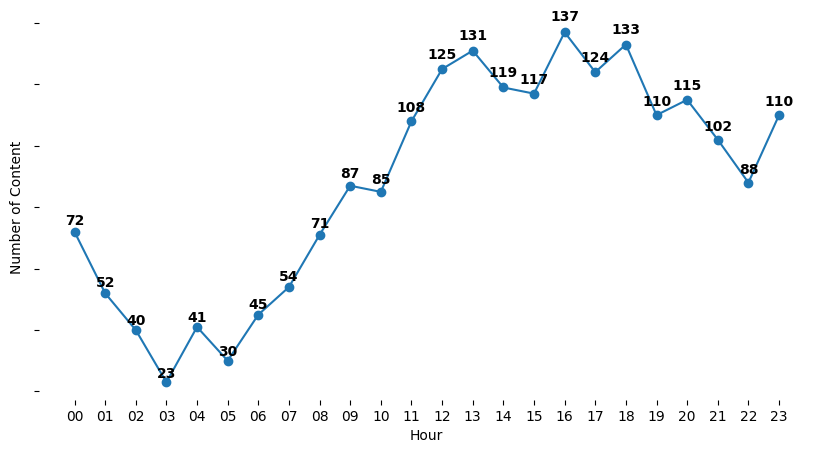

In [7]:

# Number of content per Hour
df['at_hour'] = pd.to_datetime(df['at']).dt.strftime('%H') # Format the hour as 24-hour format
content_per_hour = df['at_hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(content_per_hour.index, content_per_hour.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of Content')
plt.title('')

# Remove the numbers from the y-axis
plt.gca().axes.yaxis.set_ticklabels([])

# Remove the chart frame
plt.box(False)

# Add labels above the line with bolder font and padding
for i, content in enumerate(content_per_hour.values):
    plt.text(content_per_hour.index[i], content + content * 0.02, content, ha='center', va='bottom', fontweight='bold')

plt.show()


In [8]:
# Convert Arabic content to readable format
df['content_reshaped'] = df['content'].apply(lambda x: arabic_reshaper.reshape(x))


In [9]:
df['at_month'].dtype

dtype('int32')

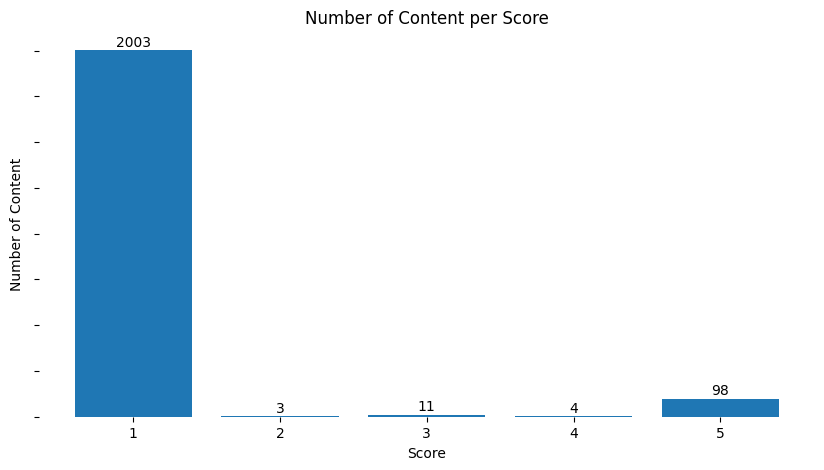

In [10]:
# Number of content per score
content_per_score = df['score'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
bars = plt.bar(content_per_score.index, content_per_score.values)
plt.xlabel('Score')
plt.ylabel('Number of Content')
plt.title('Number of Content per Score')

# Remove the numbers from the y-axis
plt.gca().axes.yaxis.set_ticklabels([])

# Remove the chart frame
plt.box(False)

# Add labels above the columns
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, str(int(height)), ha='center', va='bottom')

plt.show()


In [11]:
df['sentiment'] = df['score'].apply(lambda score: 'Negative' if score <= 2 else 'Natural' if score <= 4 else 'Positive')
sentiment_counts = df['sentiment'].value_counts

In [12]:
df['sentiment'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Negative
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
2114    Negative
2115    Positive
2116    Negative
2117    Positive
2118    Negative
Name: sentiment, Length: 2119, dtype: object>

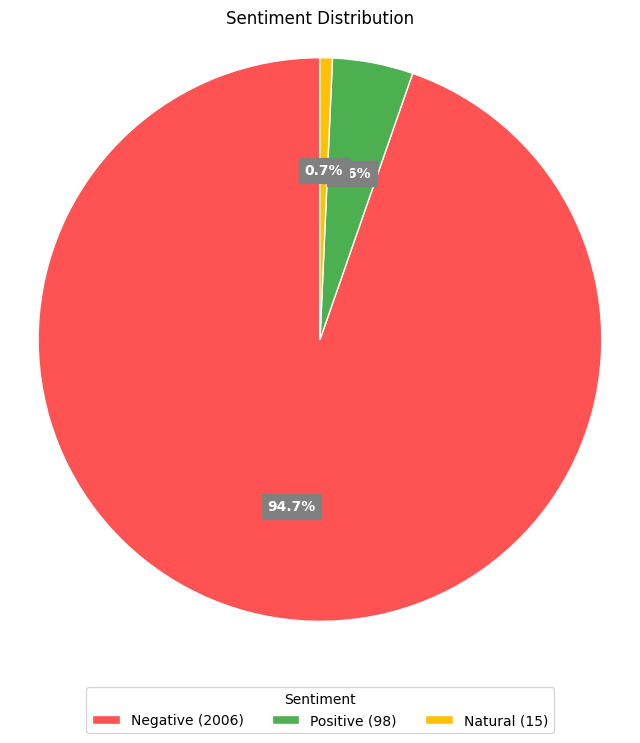

In [13]:
df['sentiment'] = df['score'].apply(lambda score: 'Negative' if score <= 2 else 'Natural' if score <= 4 else 'Positive')
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
colors = ['#FF5252','#4CAF50', '#FFC107']
patches, texts, autotexts = plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90,
                colors=colors, wedgeprops={'edgecolor': 'white'}, textprops={'color': 'white', 'weight': 'bold'})
plt.title('Sentiment Distribution')
plt.setp(autotexts, backgroundcolor='gray')

# Add numbers beside the legend
legend_labels = [f'{label} ({count})' for label, count in zip(sentiment_counts.index, sentiment_counts.values)]
plt.legend(patches, legend_labels, title='Sentiment', loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.axis('equal')
plt.show()


In [14]:
df['sentiment'] = df['score'].apply(lambda score: 'Negative' if score <= 2 else 'Natural' if score <= 4 else 'Positive')
sentiment_counts = df['sentiment'].value_counts

In [15]:
import plotly.express as px

# Create bubble chart
fig = px.scatter(
    df, 
    x="userName",  # المحور الأفقي (أسماء المستخدمين)
    y="score",     # المحور الرأسي (التقييمات)
    size="thumbsUpCount",  # حجم الدائرة يعتمد على عدد الإعجابات
    color="score",         # لون الدائرة يعتمد على التقييم
    hover_name="content",  # عرض محتوى التعليق عند التمرير فوق الدائرة
    title="Bubble Chart: User Reviews"
)

# Update layout
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    xaxis_title="User Name",
    yaxis_title="Score",
    showlegend=True
)

# Show the figure
fig.show()

In [16]:
# Top 10 repeated paragraphs
top_10_paragraphs = df['content_reshaped'].value_counts().head(10).reset_index()
top_10_paragraphs.columns = ['Paragraph', 'Count']

# Display the top 10 repeated paragraphs
for index, row in top_10_paragraphs.iterrows():
    print(f"{row['Paragraph']}: {row['Count']}")


ﺳﺊ: 55
ﺯﻓﺖ: 51
ﺣﺴﺒﻲ ﷲ ﻭﻧﻌﻢ ﺍﻟﻮﻛﻴﻞ: 49
ﺯﻱ ﺍﻟﺰﻓﺖ: 34
ﺳﺊ ﺟﺪﺍ: 34
ﺧﺮﺍ: 32
ﺯﺑﺎﻟﻪ: 29
ﺳﻴﺊ: 27
ﺳﻴﺊ ﺟﺪﺍ: 23
ﺣﺴﺒﻨﺎ ﷲ ﻭﻧﻌﻢ ﺍﻟﻮﻛﻴﻞ: 18


In [17]:
def convert_version(version):
    if version is None:
        return -1  # Assign a specific value for None values
    try:
        return float(version)
    except ValueError:
        return -1  # Assign a specific value for non-numeric versions

df['appVersion'] = df['appVersion'].apply(convert_version)
bins = pd.cut(df['appVersion'], bins=10, precision=1)
# ... rest of the code

In [18]:
# Group by app version and perform sentiment analysis
version_sentiment_analysis = df.groupby('appVersion')['score'].apply(
  lambda x: pd.Series([
    (x <= 2).sum(), # Count of Negative Reviews (Score <= 2)
    ((x > 2) & (x <= 4)).sum(), # Count of Neutral Reviews (Score > 2 and <= 4)
    (x == 5).sum()  # Count of Positive Reviews (Score == 5)
  ], index=['Negative', 'Neutral', 'Positive'])
).unstack().fillna(0) # Unstacking and filling NaN with 0

# Print the sentiment analysis for each version as a DataFrame (table)
print("Sentiment Analysis for Each App Version:")
print(version_sentiment_analysis.to_string())


Sentiment Analysis for Each App Version:
            Negative  Neutral  Positive
appVersion                             
-1              2006       15        98


In [19]:
# Create a pivot table to count the occurrences of each paragraph for each score
top_10_paragraphs = pd.pivot_table(df, index='content_reshaped', columns='score', aggfunc='size', fill_value=0)
top_10_paragraphs.columns = ['Score ' + str(col) for col in top_10_paragraphs.columns]

# Sort the paragraphs by the total count across all scores
top_10_paragraphs['Total Count'] = top_10_paragraphs.sum(axis=1)
top_10_paragraphs = top_10_paragraphs.sort_values(by='Total Count', ascending=False).head(10)

# Display the top 10 repeated paragraphs for each score as a table
top_10_paragraphs

,Score 1,Score 2,Score 3,Score 4,Score 5,Total Count
content_reshaped,,,,,,
ﺳﺊ,55,0,0,0,0,55
ﺯﻓﺖ,50,0,0,0,1,51
ﺣﺴﺒﻲ ﷲ ﻭﻧﻌﻢ ﺍﻟﻮﻛﻴﻞ,49,0,0,0,0,49
ﺯﻱ ﺍﻟﺰﻓﺖ,34,0,0,0,0,34
ﺳﺊ ﺟﺪﺍ,34,0,0,0,0,34
ﺧﺮﺍ,32,0,0,0,0,32
ﺯﺑﺎﻟﻪ,29,0,0,0,0,29
ﺳﻴﺊ,27,0,0,0,0,27
ﺳﻴﺊ ﺟﺪﺍ,23,0,0,0,0,23


In [20]:
pip install wordcloud matplotlib plotly requests


Note: you may need to restart the kernel to use updated packages.


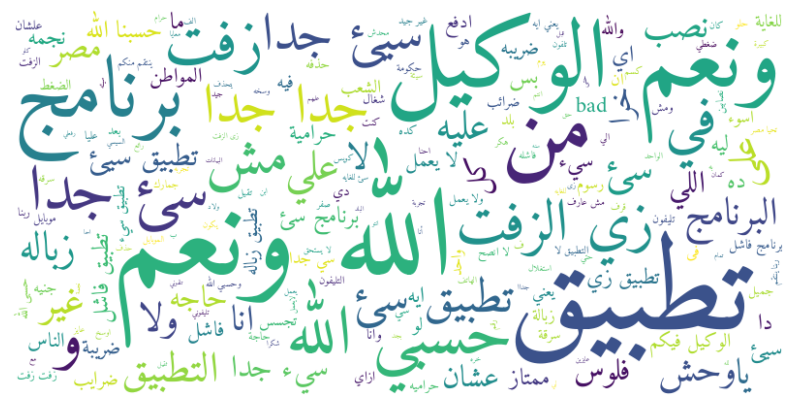

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly.express as px
import requests
from io import BytesIO
import tempfile

# Assuming your DataFrame is named 'df'

# Extract video titles and join them into a single string
content = ' '.join(df['content_reshaped'])

# Define custom stopwords (optional)
stopwords = set(STOPWORDS)
stopwords.update(["video", "new", "top", "best", "watch", "official"])  # Add more relevant stopwords

# Download an Arabic font from Google Fonts
font_url = "https://github.com/google/fonts/raw/main/ofl/amiri/Amiri-Regular.ttf"
response = requests.get(font_url)

# Save the font to a temporary file
with tempfile.NamedTemporaryFile(delete=False, suffix='.ttf') as temp_font_file:
    temp_font_file.write(response.content)
    font_path = temp_font_file.name

# Generate word cloud with the downloaded Arabic font
wordcloud = WordCloud(width=800, height=400, background_color="white", 
                      stopwords=stopwords, font_path=font_path).generate(content)

# Display the generated image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              2119 non-null   object        
 1   userName              2119 non-null   object        
 2   userImage             2119 non-null   object        
 3   content               2119 non-null   object        
 4   score                 2119 non-null   int64         
 5   thumbsUpCount         2119 non-null   int64         
 6   reviewCreatedVersion  1327 non-null   object        
 7   at                    2119 non-null   datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            2119 non-null   int64         
 11  at_month              2119 non-null   int32         
 12  at_hour               2119 non-null   object        
 13  content_reshaped  

In [23]:
# Create interactive treemap
fig = px.treemap(df, path=[px.Constant("score"), 'userName','content'], values='thumbsUpCount') 
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [24]:
import plotly.express as px

# Create bubble chart
fig = px.scatter(
    df, 
    x="userName",  # المحور الأفقي (أسماء المستخدمين)
    y="score",     # المحور الرأسي (التقييمات)
    size="thumbsUpCount",  # حجم الدائرة يعتمد على عدد الإعجابات
    color="score",         # لون الدائرة يعتمد على التقييم
    hover_name="content",  # عرض محتوى التعليق عند التمرير فوق الدائرة
    title="Bubble Chart: User Reviews"
)

# Update layout
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    xaxis_title="User Name",
    yaxis_title="Score",
    showlegend=True
)

# Show the figure
fig.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              2119 non-null   object        
 1   userName              2119 non-null   object        
 2   userImage             2119 non-null   object        
 3   content               2119 non-null   object        
 4   score                 2119 non-null   int64         
 5   thumbsUpCount         2119 non-null   int64         
 6   reviewCreatedVersion  1327 non-null   object        
 7   at                    2119 non-null   datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            2119 non-null   int64         
 11  at_month              2119 non-null   int32         
 12  at_hour               2119 non-null   object        
 13  content_reshaped  